In [7]:
!curl -L -o fruits.zip https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  1  101M    1 1626k    0     0   847k      0  0:02:02  0:00:01  0:02:01  847k
 12  101M   12 12.2M    0     0  4284k      0  0:00:24  0:00:02  0:00:22 4285k
 19  101M   19 19.5M    0     0  5107k      0  0:00:20  0:00:03  0:00:17 5108k
 33  101M   33 33.6M    0     0  7001k      0  0:00:14  0:00:04  0:00:10 7003k
 42  101M   42 43.0M    0     0  7406k      0  0:00:13  0:00:05  0:00:08 9349k
 51  101M   51 51.8M    0     0  7645k      0  0:00:13  0:00:06  0:00:07  9.9M
 63  101M   63 64.2M    0     0  8300k      0  0:00:12  0:00:07  0:00:05 10.3M
 74  101M   74 75.6M    0     0  8690k      0  0:00:11  0:00:08  0:00:03 11.2M
 84  101M   84 85.1M    0     0  8782k      0  0:00

In [8]:
!powershell -Command "Expand-Archive -Path 'fruits.zip' -DestinationPath '.'"

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
pip install tensorflow


  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.75.1-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached ml_dtypes-0.5.3-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using c

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


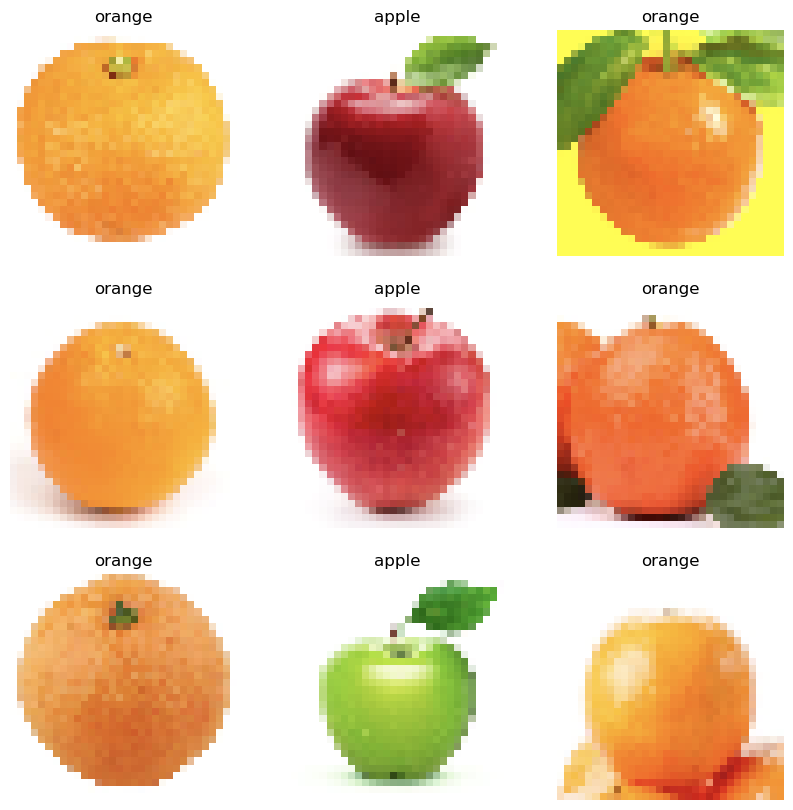

In [5]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [7]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [8]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.4609 - loss: 1.0328 - val_accuracy: 0.5455 - val_loss: 0.8692
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6587 - loss: 0.7305 - val_accuracy: 0.7576 - val_loss: 0.5393
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8087 - loss: 0.4830 - val_accuracy: 0.9091 - val_loss: 0.3474
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8457 - loss: 0.3727 - val_accuracy: 0.9242 - val_loss: 0.2409
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8957 - loss: 0.2646 - val_accuracy: 0.9394 - val_loss: 0.1932
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9304 - loss: 0.1836 - val_accuracy: 0.8788 - val_loss: 0.2576
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9326 - loss: 0.2008 - val_accuracy: 0.8939 - val_loss: 0.2751
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9239 - loss: 0.2106 - val_accuracy: 0.8636 - v

In [9]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9385 - loss: 0.2034


[0.20344673097133636, 0.9384615421295166]

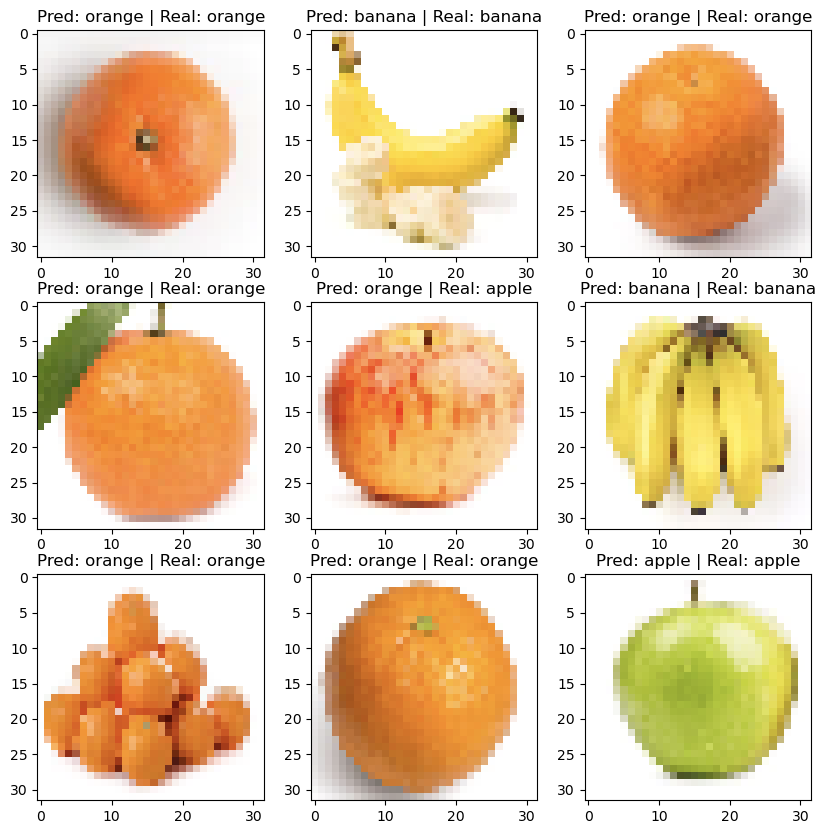

In [10]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\pc\AppData\Local\Temp\tmp206uw5m9\assets


INFO:tensorflow:Assets written to: C:\Users\pc\AppData\Local\Temp\tmp206uw5m9\assets


Saved artifact at 'C:\Users\pc\AppData\Local\Temp\tmp206uw5m9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2461527268368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527266640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527271632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527271824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527267984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527272016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527498512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527499280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527276240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2461527499664: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [12]:
!powershell -Command "Expand-Archive -Path 'Fruits2.zip' -DestinationPath '.'"

In [23]:
import os

data_dir = "Fruits Dataset/Fruits Dataset/train"
classes = os.listdir(data_dir)
print("Classes disponibles :", classes)


Classes disponibles : ['apple', 'banana', 'cherry', 'grape', 'kiwi', 'mango', 'orange', 'peach', 'pear', 'plum', 'strawberry', 'watermelon']
